### Importing Important Modules and Database connectors

In [1]:
! pip install chembl_webresource_client

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.2/55.2 KB 478.4 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 KB 3.6 MB/s eta 0:00:00
  Attempting uninstall: itsdangerous
    Found existing installation: itsdangerous 1.1.0
    Uninstalling itsdangerous-1.1.0:
      Successfully uninstalled itsdangerous-1.1.0
  Attempting uninstall: attrs
    Found existing installation: attrs 22.2.0
    Uninstalling attrs-22.2.0:
      Successfully uninstalled attrs-22.2.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires itsdangerous<2.0,>=0.24, but you have itsdangerous 2.1.2 which is incompatible.


In [2]:
import pandas as pd
import numpy as np
from chembl_webresource_client.new_client import new_client
import matplotlib.pyplot as plt

### Collecting And Processing Data
* Our main goal is to process the target protien structure `independent variable`
* And predict the `IC50` value the `dependent variable`
* To process the chemical structure Ww will be using `Padel Descripter` later on

In [3]:
target = new_client.target
target_query = target.search('coronavirus')
target_result = pd.DataFrame.from_dict(target_query)

In [4]:
target_result

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,[],Coronavirus,Coronavirus,17.0,False,CHEMBL613732,[],ORGANISM,11119
1,[],SARS coronavirus,SARS coronavirus,15.0,False,CHEMBL612575,[],ORGANISM,227859
2,[],Feline coronavirus,Feline coronavirus,15.0,False,CHEMBL612744,[],ORGANISM,12663
3,[],Human coronavirus 229E,Human coronavirus 229E,13.0,False,CHEMBL613837,[],ORGANISM,11137
4,"[{'xref_id': 'P0C6U8', 'xref_name': None, 'xre...",SARS coronavirus,SARS coronavirus 3C-like proteinase,10.0,False,CHEMBL3927,"[{'accession': 'P0C6U8', 'component_descriptio...",SINGLE PROTEIN,227859
5,[],Middle East respiratory syndrome-related coron...,Middle East respiratory syndrome-related coron...,9.0,False,CHEMBL4296578,[],ORGANISM,1335626
6,"[{'xref_id': 'P0C6X7', 'xref_name': None, 'xre...",SARS coronavirus,Replicase polyprotein 1ab,4.0,False,CHEMBL5118,"[{'accession': 'P0C6X7', 'component_descriptio...",SINGLE PROTEIN,227859
7,[],Severe acute respiratory syndrome coronavirus 2,Replicase polyprotein 1ab,4.0,False,CHEMBL4523582,"[{'accession': 'P0DTD1', 'component_descriptio...",SINGLE PROTEIN,2697049


In [5]:
selected_target1 = target_result.target_chembl_id[4]
selected_target1

'CHEMBL3927'

In [6]:
activity1 = new_client.activity
res = activity1.filter(target_chembl_id=selected_target1).filter(standard_type='IC50')
df1 = pd.DataFrame.from_dict(res)

In [7]:
df1.head(3)

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,1480935,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,BAO_0000357,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,7.2
1,None,1480936,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,BAO_0000357,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,9.4
2,None,1481061,[],CHEMBL830868,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,BAO_0000357,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,13.5


### Only Selecting the required Columns

In [8]:
columns = ['canonical_smiles','molecule_chembl_id','standard_value']

In [9]:
df1_selected = df1[columns]

In [10]:
len(df1_selected)

133

### Fixing Missing Values
* For that I am using mean() of the column `standard_value`
* For values greater than `100000000` I am going to limit it to `100000000` so after converting to log value it will not show any negative value
* Then we will finally apply to convert all `standard_value` to log of `standard_value` so it will fix high deviation and outliers(most of them atleast)

In [11]:
df1_selected.isnull().sum()

canonical_smiles      0
molecule_chembl_id    0
standard_value        0
dtype: int64

In [12]:
df1_selected['standard_value'].dtype

dtype('O')

In [13]:
df1_selected['standard_value'] = df1_selected['standard_value'].astype(float)

<ipython-input-13-3a9a20ee965c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_selected['standard_value'] = df1_selected['standard_value'].astype(float)


In [14]:
df1_selected['standard_value'].dtype

dtype('float64')

In [15]:
df1_selected['standard_value'].head(3)

0     7200.0
1     9400.0
2    13500.0
Name: standard_value, dtype: float64

In [16]:
try:
  df1_selected['standard_value'].fillna(df1_selected['standard_value'].mean(),inplace=True)
except:
  pass

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [17]:
df1_selected.isnull().sum()

canonical_smiles      0
molecule_chembl_id    0
standard_value        0
dtype: int64

In [18]:
df1_selected[(df1_selected['standard_value']>1000) & (df1_selected['standard_value']<10000)]

,canonical_smiles,molecule_chembl_id,standard_value
0,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,CHEMBL187579,7200.0
1,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,CHEMBL188487,9400.0
4,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],CHEMBL187717,2000.0
6,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccc(F)cc21,CHEMBL187598,4820.0
20,O=C1C(=O)N(Cc2ccc3ccccc3c2)c2ccc(I)cc21,CHEMBL383725,1100.0
23,O=C(CSc1nccc(-c2csc(-c3ccccc3)n2)n1)Nc1cc(Cl)c...,CHEMBL208732,3000.0
79,Nc1ncc(S(=O)(=O)c2ccc(Cl)cc2)c(N)n1,CHEMBL213581,6000.0
89,O=C(Sc1nnc(C(F)(F)F)[nH]1)c1ccc(C#Cc2ccccc2)o1,CHEMBL379642,3000.0
90,Cc1noc(NC(=O)c2ccc(-c3cc(C(F)(F)F)nn3C)s2)c1[N...,CHEMBL427404,5000.0
114,Cc1coc2c1C(=O)C(=O)c1c-2ccc2c1CCCC2(C)C,CHEMBL187266,1600.0


In [19]:
df1_selected[(df1_selected['standard_value']>1000) & (df1_selected['standard_value']<10000)].index

Int64Index([0, 1, 4, 6, 20, 23, 79, 89, 90, 114, 116, 118, 119, 124], dtype='int64')

In [20]:
df1_selected = df1_selected.drop(index=df1_selected[(df1_selected['standard_value']>1000) & (df1_selected['standard_value']<10000)].index,axis=0)

In [21]:
len(df1_selected)

119

In [22]:
def norm_val(data):
  for i in data['standard_value']:
    if i > 100000000:
      data['standard_value'] = data['standard_value'].replace(i,100000000)
  return data['standard_value']

In [23]:
def convert_log(data):
  pIC50 = []
  for i in data['standard_value']:
    data['standard_value'] = data['standard_value'].replace(i,-np.log10(i*(10**-9)))
  return data['standard_value']

In [24]:
df1_selected.describe()

,standard_value
count,1.190000e+02
mean,8.961211e+12
std,3.525685e+13
min,5.000000e+01
25%,1.305500e+04
50%,3.870000e+04
75%,4.500000e+05
max,3.311311e+14


In [25]:
df1_selected['standard_value'] = norm_val(df1_selected)

In [26]:
df1_selected['standard_value'] = convert_log(df1_selected)

In [27]:
df1_selected['standard_value'].head()

2    4.869666
3    4.882397
5    6.008774
7    6.022276
8    4.950782
Name: standard_value, dtype: float64

In [28]:
df1_selected.isnull().sum()

canonical_smiles      0
molecule_chembl_id    0
standard_value        0
dtype: int64

In [29]:
try:
  df1_selected.replace([np.inf, -np.inf], np.nan, inplace=True)
  df1_selected['standard_value'].fillna(df1_selected['standard_value'].mean(),inplace=True)
except:
  pass

### Creating labels and features

In [30]:
df1_x = df1_selected.drop(columns=['standard_value'],axis=1)
df1_y = df1_selected['standard_value']

In [31]:
len(df1_x),len(df1_x)

(119, 119)

In [32]:
df1_x.to_csv('molecule.smi', sep='\t', index=False, header=False)
df1_y.to_csv('corona_labels.csv',index=False)

### A quick look at files

In [33]:
! ls

corona_labels.csv  molecule.smi  sample_data


In [34]:
! cat molecule.smi | head -5

O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21	CHEMBL185698
O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21	CHEMBL426082
O=C1C(=O)N(Cc2cc3ccccc3s2)c2c(Br)cccc21	CHEMBL365134
O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccc(I)cc21	CHEMBL190743
O=C1C(=O)N(Cc2cc3ccccc3s2)c2cccc(Cl)c21	CHEMBL365469


### Using padel Descriptor to break it into dataset form

In [35]:

! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.sh

--2023-02-26 10:27:28--  https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip [following]
--2023-02-26 10:27:28--  https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25768637 (25M) [application/zip]
Saving to: ‘padel.zip’

padel.zip           100%[===================>]  24.57M  60.3MB/s    in 0.4s    

2023-02-26 10:27:31 (60.3 MB/s) - ‘padel.zip’ saved [25768637/25768637]

--2023-02-26 10:27:31--  https://git

In [36]:
! unzip padel.zip

Archive:  padel.zip
   creating: PaDEL-Descriptor/
  inflating: __MACOSX/._PaDEL-Descriptor  
  inflating: PaDEL-Descriptor/MACCSFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._MACCSFingerprinter.xml  
  inflating: PaDEL-Descriptor/AtomPairs2DFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._AtomPairs2DFingerprinter.xml  
  inflating: PaDEL-Descriptor/EStateFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._EStateFingerprinter.xml  
  inflating: PaDEL-Descriptor/Fingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._Fingerprinter.xml  
  inflating: PaDEL-Descriptor/.DS_Store  
  inflating: __MACOSX/PaDEL-Descriptor/._.DS_Store  
   creating: PaDEL-Descriptor/license/
  inflating: __MACOSX/PaDEL-Descriptor/._license  
  inflating: PaDEL-Descriptor/KlekotaRothFingerprintCount.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._KlekotaRothFingerprintCount.xml  
  inflating: PaDEL-Descriptor/config  
  inflating: __MACOSX/PaDEL-Descriptor/._config  
  inf

In [37]:
! bash padel.sh

Processing CHEMBL185698 in molecule.smi (1/119). 
Processing CHEMBL426082 in molecule.smi (2/119). 
Processing CHEMBL365134 in molecule.smi (3/119). Average speed: 5.21 s/mol.
Processing CHEMBL190743 in molecule.smi (4/119). Average speed: 2.73 s/mol.
Processing CHEMBL365469 in molecule.smi (5/119). Average speed: 2.32 s/mol.
Processing CHEMBL188983 in molecule.smi (6/119). Average speed: 1.75 s/mol.
Processing CHEMBL191575 in molecule.smi (7/119). Average speed: 1.54 s/mol.
Processing CHEMBL370923 in molecule.smi (8/119). Average speed: 1.34 s/mol.
Processing CHEMBL194398 in molecule.smi (9/119). Average speed: 1.24 s/mol.
Processing CHEMBL196635 in molecule.smi (10/119). Average speed: 1.09 s/mol.
Processing CHEMBL209287 in molecule.smi (11/119). Average speed: 1.05 s/mol.
Processing CHEMBL358279 in molecule.smi (12/119). Average speed: 0.98 s/mol.
Processing CHEMBL348660 in molecule.smi (13/119). Average speed: 0.89 s/mol.
Processing CHEMBL379727 in molecule.smi (14/119). Average sp

### Model selection and usage

### Importing Modules

In [38]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor , ExtraTreesRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, KFold , cross_val_score
from sklearn.metrics import r2_score
from sklearn.feature_selection import VarianceThreshold

### Using different models and importing processed data 

In [39]:
X = pd.read_csv('descriptors_output.csv')
Y = pd.read_csv('corona_labels.csv')

In [40]:
Y['standard_value'].isnull().sum()

0

In [41]:
for i in Y['standard_value']:
  Y['standard_value'] = Y['standard_value'].replace(i,round(i,2))

In [42]:
Y.standard_value.unique()

array([4.87, 4.88, 6.01, 6.02, 4.95, 4.63, 4.9 , 4.76, 8.36, 4.15, 4.18,
       6.43, 4.72, 8.34, 4.3 , 8.09, 8.07, 3.6 , 4.  , 8.37, 8.08, 8.31,
       3.  , 3.3 , 3.4 , 3.46, 4.85, 4.96, 8.3 , 6.05, 4.49, 4.7 , 6.52,
       7.22, 7.2 , 6.47, 6.57, 7.02, 7.19, 7.3 , 6.77, 4.05, 4.61, 8.33,
       3.64, 4.41, 4.84, 6.1 , 4.28, 4.06, 6.15, 4.22, 4.77, 4.97, 5.  ,
       4.94, 4.1 ])

In [43]:
Y.describe()

,standard_value
count,119.000000
mean,6.844118
std,1.714814
min,3.000000
25%,4.920000
50%,8.090000
75%,8.090000
max,8.370000


In [44]:
Y = Y.to_numpy().ravel()
X = X.drop(columns=['Name'],axis=1)

In [45]:
X.head(3)

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [46]:
Y[:5]

array([4.87, 4.88, 6.01, 6.02, 4.95])

In [47]:
X.shape

(119, 881)

### Using `Variance Threshold` Technique to remove unwanted columns with low variance

### Defining all the Regressors

In [48]:
rfe = RandomForestRegressor(n_estimators = 100)
dtree = DecisionTreeRegressor()
svr = SVR()
etree = ExtraTreesRegressor()

### Using different regressors and finding best fit model for our dataset after training for 1000 epochs

In [49]:
max_acc_rfe = 0
max_acc_idx_rfe = 0
for i in range(1000):
  X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=i)
  rfe.fit(X_train,Y_train)
  Y_pred = rfe.predict(X_test)
  acc_rfe = r2_score(Y_test,Y_pred)
  if max_acc_rfe < acc_rfe:
    max_acc_rfe = acc_rfe
    max_acc_idx_rfe = i

In [50]:
max_acc_rfe

0.7007038792238026

In [51]:
max_acc_idx_rfe

841

In [52]:
max_acc_dtree = 0
max_acc_idx_dtree = 0
for i in range(1000):
  X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=i)
  dtree.fit(X_train,Y_train)
  Y_pred = dtree.predict(X_test)
  acc_dtree = r2_score(Y_test,Y_pred)
  if max_acc_dtree < acc_dtree:
    max_acc_dtree = acc_dtree
    max_acc_idx_dtree = i

In [53]:
max_acc_dtree

0.5200589707130419

In [54]:
max_acc_idx_dtree

841

In [55]:
max_acc_svr = 0
max_acc_idx_svr = 0
for i in range(1000):
  X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=i)
  svr.fit(X_train,Y_train)
  Y_pred = svr.predict(X_test)
  acc_svr = r2_score(Y_test,Y_pred)
  if max_acc_svr < acc_svr:
    max_acc_svr = acc_svr
    max_acc_idx_svr = i

In [56]:
max_acc_svr

0.7917259860056954

In [57]:
max_acc_idx_svr

735

In [58]:
max_acc_etree = 0
max_acc_idx_etree = 0
for i in range(1000):
  X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=i)
  etree.fit(X_train,Y_train)
  Y_pred = etree.predict(X_test)
  acc_etree = r2_score(Y_test,Y_pred)
  if max_acc_etree < acc_etree:
    max_acc_etree = acc_etree
    max_acc_idx_etree = i

In [59]:
max_acc_etree

0.5017403443541328

In [60]:
max_acc_idx_etree

841

### Model Performance

In [61]:
import seaborn as sns

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


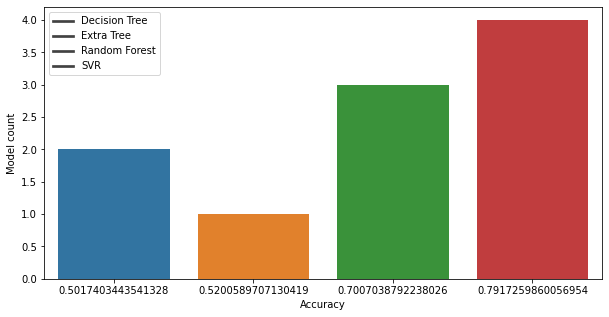

In [62]:
x_axis = [max_acc_dtree,max_acc_etree,max_acc_rfe,max_acc_svr]
y_axis = [1,2,3,4]

plt.figure(figsize=(10,5))
sns.barplot(x_axis,y_axis)
plt.xlabel("Accuracy")
plt.ylabel("Model count")
plt.legend(["Decision Tree","Extra Tree","Random Forest","SVR"])
plt.show()

### Using model with highest accuracy

In [63]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=max_acc_idx_svr)
svr.fit(X_train,Y_train)
Y_pred = svr.predict(X_test)
acc = r2_score(Y_test,Y_pred)

In [64]:
acc

0.7917259860056954

### Saving model state for later use

In [65]:
import pickle

pickle.dump(svr,open("trained_model.pkl","wb"))